In [22]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import re
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn import svm  
from sklearn.cross_validation import cross_val_predict
from sklearn.preprocessing import StandardScaler

## Test Images

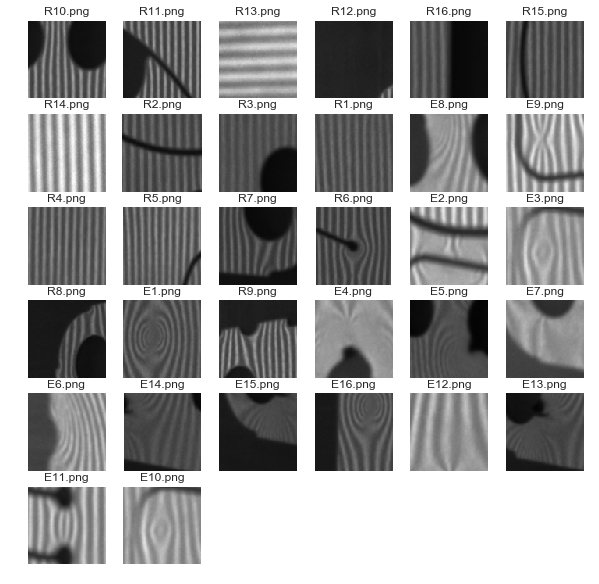

In [31]:
path = "../img/GLCM/";
plt.figure(figsize=(10, 10))
img_list = os.listdir(path)
img_list.remove('.DS_Store')
rows = len(img_list)//6+1
for idx in range(len(img_list)):
    plt.subplot(rows, 6, idx+1)
    img = plt.imread(path+img_list[idx])
    plt.axis("off")
    plt.title(img_list[idx])
    plt.imshow(img, cmap='Greys_r')

## 从GLCM_result.csv读取数据

In [11]:
GLCM_param = pd.read_csv("../GLCM_result.csv")
pattern = re.compile(r'\w*/\w*')
GLCM_param["Picture"] = [pattern.findall(p)[-1][1:] for p in GLCM_param["Picture"]]

### 部分数据展示

In [13]:
GLCM_param

,Picture,Angle,Entropy,Homogeneity,Contrast,ASM,Correlation
0,E1,0,-0.110681,0.881818,0.236364,0.510579,0.004498
1,E1,90,-0.075824,0.909091,0.181818,0.510083,0.010140
2,E1,45,-0.120225,0.875000,0.250000,0.498550,0.003895
3,E1,135,-0.127437,0.870000,0.260000,0.499800,0.002911
4,E2,0,-0.297087,0.708182,0.627273,0.145083,0.029863
5,E2,90,-0.087984,0.877273,0.245455,0.217479,0.054222
6,E2,45,-0.161611,0.810000,0.380000,0.173200,0.044733
7,E2,135,-0.460234,0.615000,1.010000,0.131750,0.009568
8,E3,0,-0.089770,0.877273,0.245455,0.254835,0.048961
9,E3,90,-0.082304,0.886364,0.227273,0.265909,0.050034


## 用不同的参数为y轴对每个图像画出折线

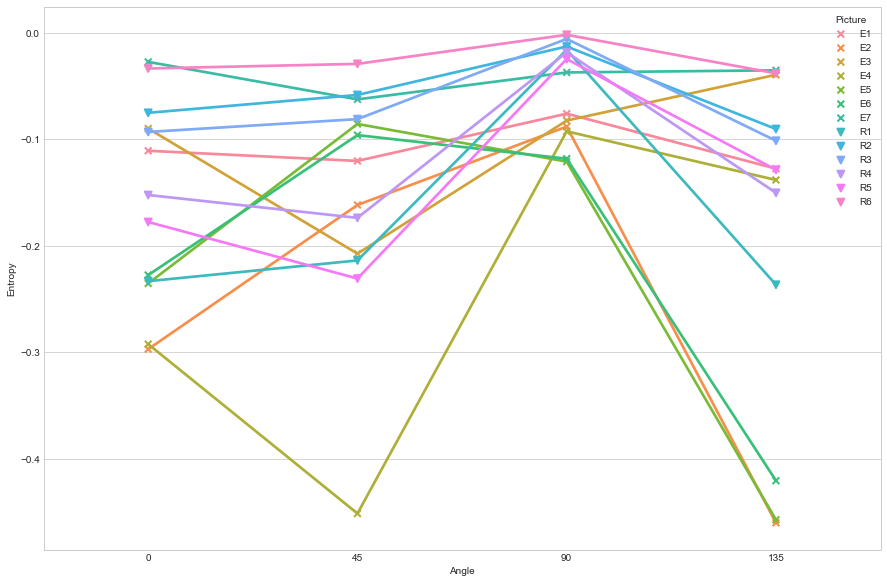

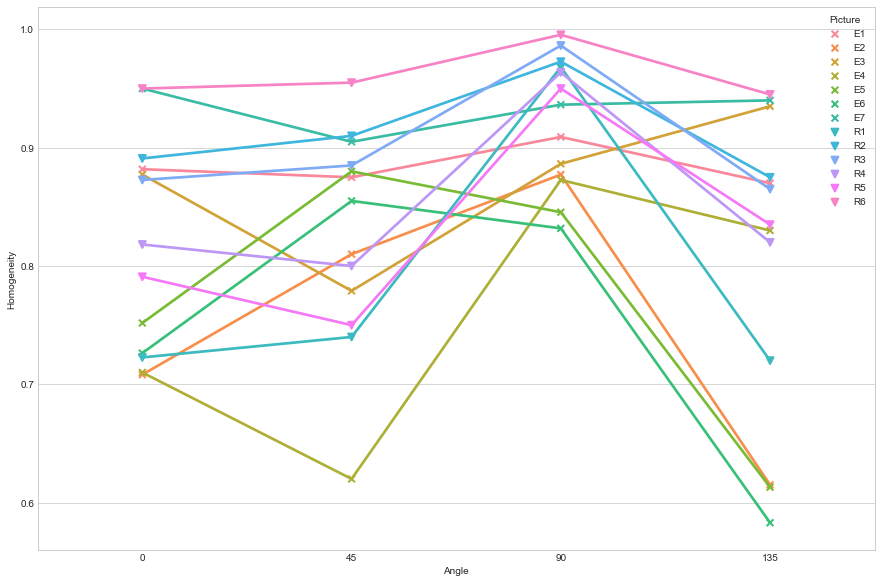

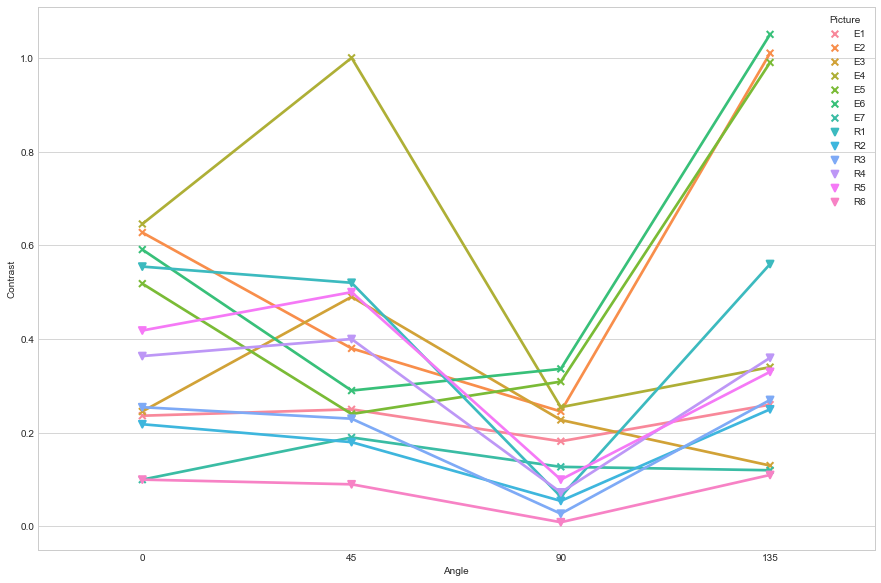

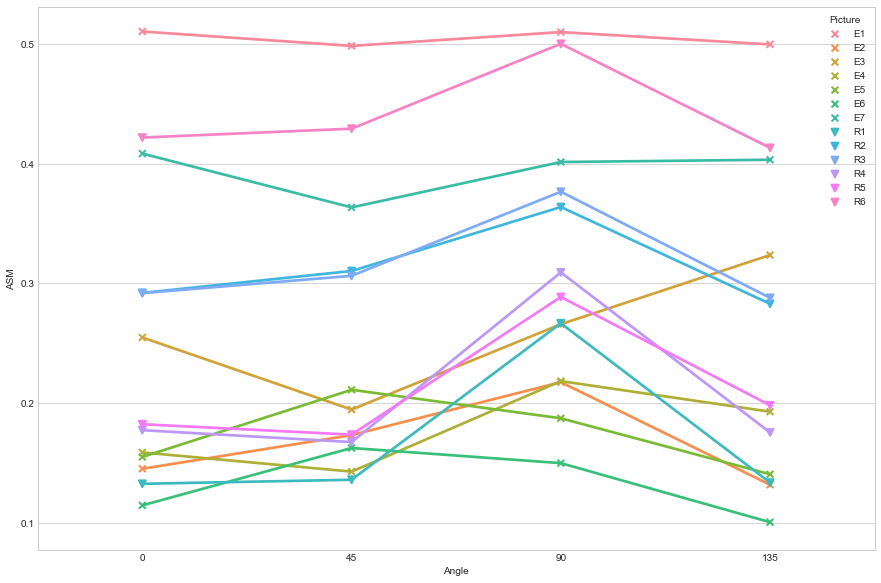

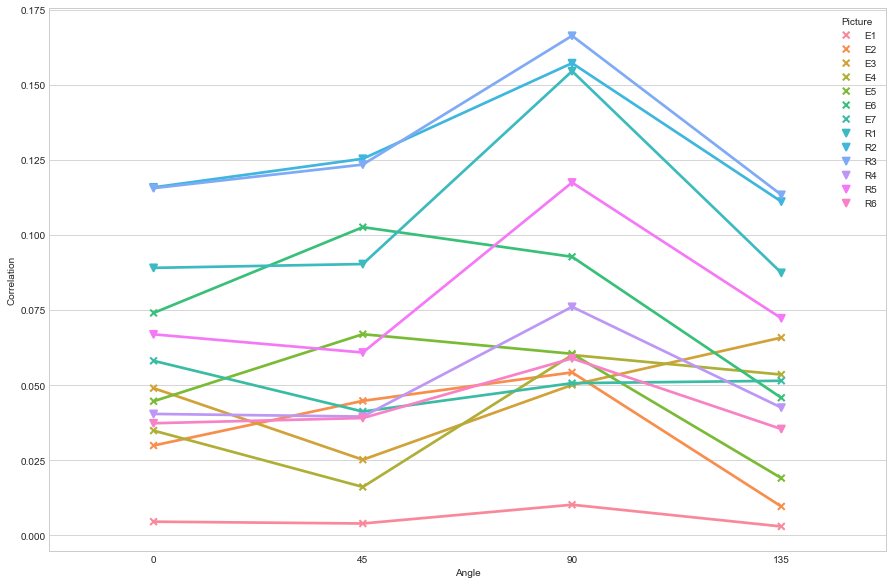

In [32]:
param_list = GLCM_param.columns[2:]
image_list = GLCM_param.Picture.unique()
markers = ["x" if img[0]=="E" else "v" for img in image_list ]
for param in param_list:  
    plt.figure(figsize=(15, 10))
    sns.pointplot(x="Angle", y=param, hue="Picture", data=GLCM_param, markers=markers);
    plt.savefig(param)

## SVM

In [15]:
pic_list = GLCM_param.Picture.unique().tolist()
n = len(pic_list)
X = np.zeros((n, 4*5))
y = np.zeros((n,))
for idx, pic in enumerate(pic_list):
    X[idx, :] = np.array(GLCM_param[GLCM_param.Picture == pic].iloc[:, 2:]).reshape(1, -1)
    if pic[0] == 'R':
        y[idx] = 1

In [16]:
cnt = 15
scaler = StandardScaler()
train_X = np.row_stack((X[0: cnt, :], X[-cnt:, :]))
train_X = scaler.fit_transform(train_X)
train_y = np.append(y[0: cnt], y[-cnt:])
test_X = X[cnt: -cnt, :]
test_X = scaler.transform(test_X)
test_y = y[cnt: -cnt]

ValueError: Found array with 0 sample(s) (shape=(0, 20)) while a minimum of 1 is required by StandardScaler.

In [29]:
scores = cross_val_score(svm.SVC(C=2, gamma=0.5), scaler.fit_transform(X), y, cv=2, scoring='accuracy')
print(scores)

NameError: name 'cross_val_score' is not defined

In [889]:
clf = svm.SVC(C=2, gamma=0.5)
clf.fit(train_X, train_y)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [890]:
np.count_nonzero((clf.predict(train_X) == train_y).astype(int)) / len(train_y)

1.0

In [892]:
np.count_nonzero((clf.predict(test_X) == test_y).astype(int)) / len(test_y)

0.5